# Анализ клиентов фитнес-центра

В рамках данного проекта необходимо изучить клиентскую базу, просчитать отток клиентов и  разработать стратегию взаимодействия с клиентами сети фитнес-центров "Культурист-датасаентист".

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет.

**Цели проекта**

 - выделить целевые группы клиентов;
 - предложить меры по снижению оттока;
 - определить другие особенности взаимодействия с клиентами.

**План работы:**

1. Изучить датафрейм
2. Провести исследовательский анализ данных
3. Построить модель прогнозирования оттока клиентов
4. Сделать кластеризацию клиентов
5. Написать общий вывод

Входные данные - `файл с данными на месяц до оттока и факт оттока на определённый период`

## Загрузка данных

In [ ]:
# импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score)
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# сохраняем и выводим данные

try:
    data = pd.read_csv('/datasets/gym_churn.csv')
except:
    print('error')

display(data.head(20))

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [ ]:
# смотрим общую информацию

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

**Вывод**

- В данных представлено 14 столбцов и 4000 строк
- Пропуски отсутствуют
- Присутствуют некорректные типы данных в столбцах
- Название столбцов необходимо привести к змеиному регистру

## Исследовательский анализ данных

In [ ]:
# приводим названия колонок к правильному виду

data.columns = [x.lower() for x in data.columns]
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [ ]:
# проверяем уникальные месяцы

data['month_to_end_contract'].unique()

array([ 5., 12.,  1.,  6.,  3., 10., 11.,  9.,  4.,  7.,  8.,  2.])

In [ ]:
# приводим тип данных в столбце к корректному типу

data['month_to_end_contract'] = data['month_to_end_contract'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [ ]:
# проверяем распределение всех числовых данных

data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [ ]:
group_churn = data.groupby('churn').mean().style.format('{:.2f}')
display(group_churn)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.51,0.87,0.53,0.35,0.90,5.75,0.46,29.98,158.45,5.28,4.71,2.02,2.03
1,0.51,0.77,0.36,0.18,0.90,1.73,0.27,26.99,115.08,1.66,0.99,1.47,1.04


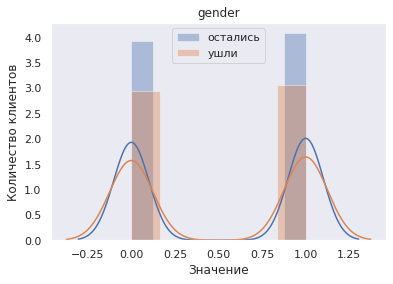

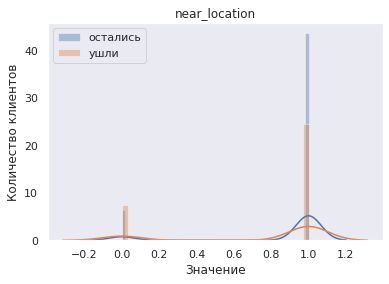

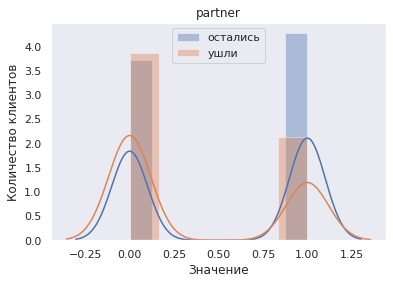

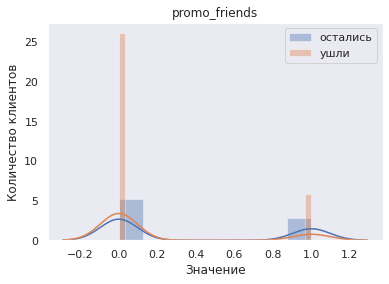

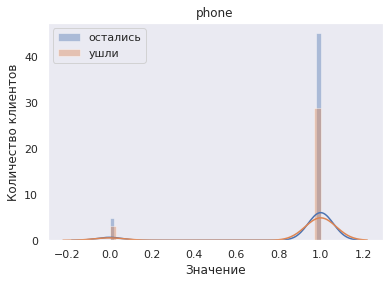

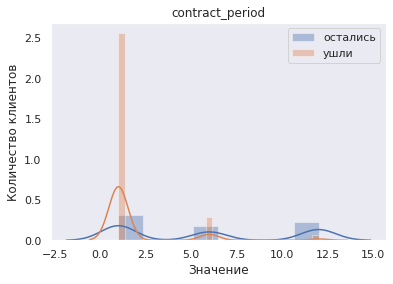

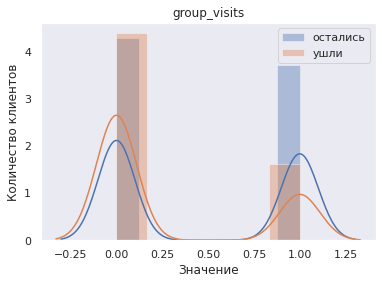

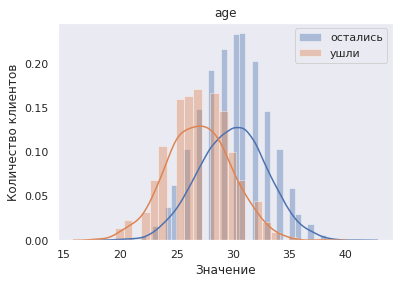

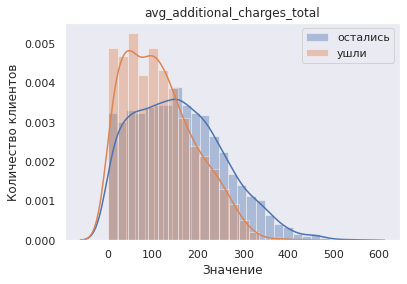

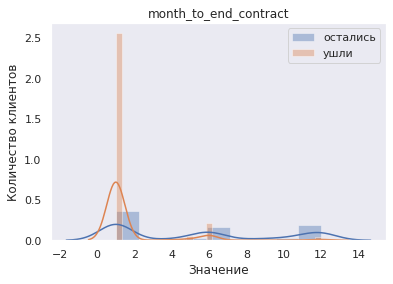

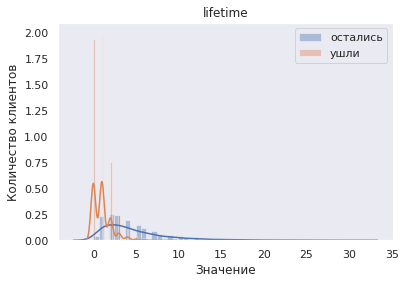

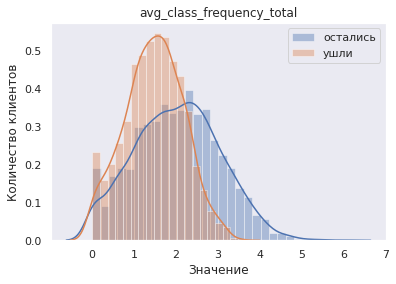

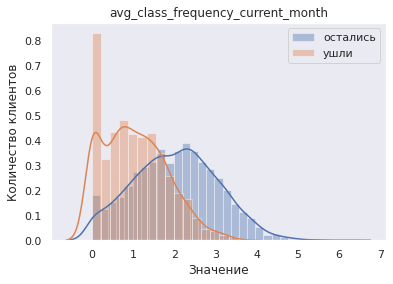

In [ ]:
# строим графики для каждого параметра по типу оттока

sns.set()
fig, ax_lst = plt.subplots(1, 1)


for col in data.drop('churn', axis=1).columns:
    sns.distplot(data.loc[data['churn'] == 0, col], label='остались')
    sns.distplot(data.loc[data['churn'] == 1, col], label='ушли')

    plt.ylabel('Количество клиентов')
    plt.xlabel('Значение')
    plt.grid()
    plt.title(f'{col}')
    plt.legend()
    plt.show()


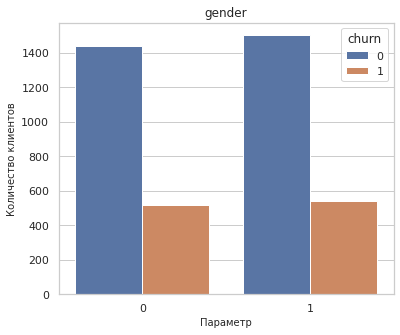

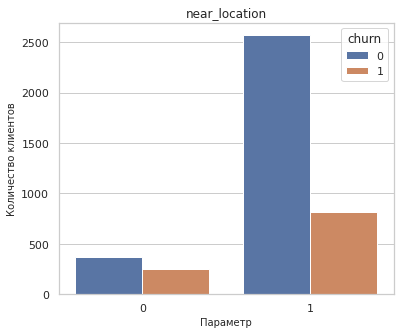

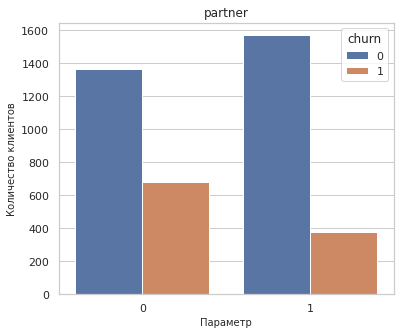

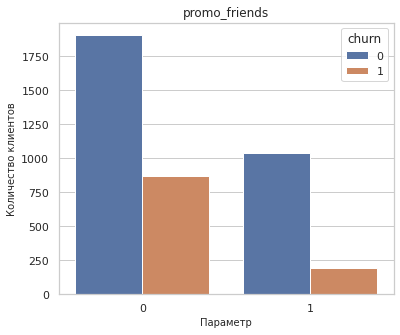

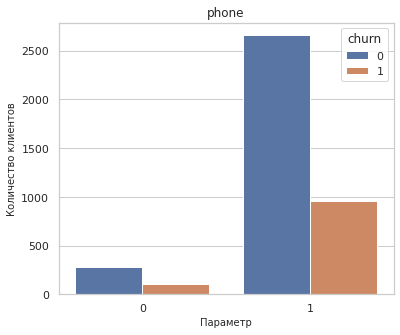

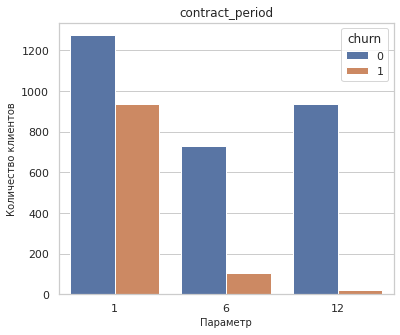

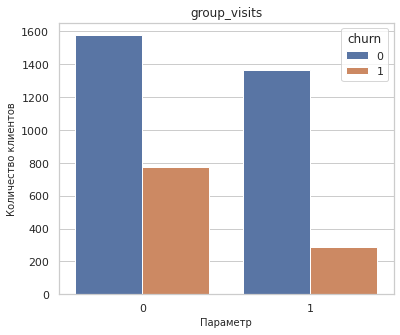

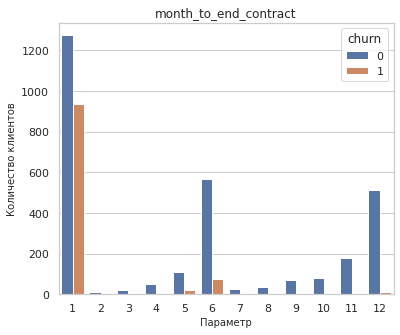

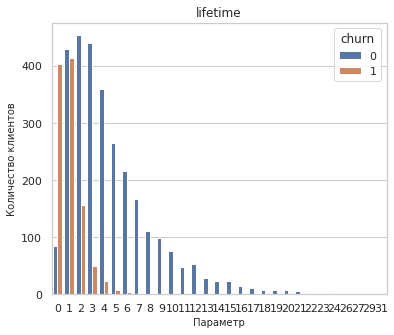

In [ ]:
# выводим количество людей по каждому параметру среди категорий оттока

data_col = data.drop(['age',
                      'avg_additional_charges_total',
                      'avg_class_frequency_total',
                      'avg_class_frequency_current_month',
                      'churn'], axis=1)

for col in data_col.columns:
    sns.set_style('whitegrid')
    plt.figure(figsize=(6, 5))
    sns.countplot(data=data, x=col, hue='churn')
    plt.title(col, size=12)
    plt.xlabel('Параметр', size=10)
    plt.ylabel('Количество клиентов', size=10)
    plt.show()

**Вывод**

Больше всего отток происходит по параметрам:

 - Клиенты, участвующую в акции "приведи друга"
 - Со сроком абонемента менее 6 месяцев
 - Клиенты в возрасте 28 лет
 - Клиенты, которые мало тратят на доп. услуги
 - Те, у кого до окончания абонемента осталось меньше месяца
 - С частотой посещения зала меньше 2-х раз в неделю

Лояльные клиенты чаще встречаются по следующим параметрам:

 - Клиенты, проживающие в районе, где находится фитнес центр
 - Клиенты, работающие в компаниях партнёров
 - Оставившие номер телефона
 - Со сроком абонемента 6 или 12 месяцев
 - Посещающие групповые занятия
 - Старше 28 лет
 - Клиенты, которые занимаются 3 и более раз в неделю

Нет разницы в оттоке:

 - В половом разделении
 - У тех, кто не посещает групповые занятия

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


<AxesSubplot:>

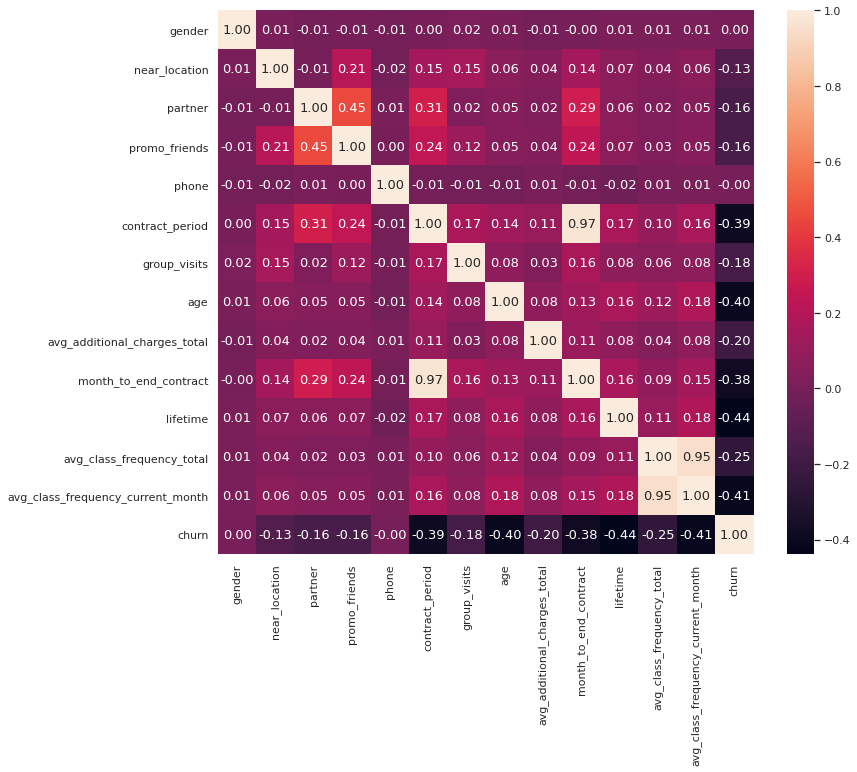

In [ ]:
# проверяем корреляцию параметров на наличие мультиколлинеарности

cm = data.corr()
display(cm)

plt.figure(figsize=(12, 10))

sns.heatmap(cm, annot=True, annot_kws={'size':13}, fmt='0.2f')

**Вывод**

Сильной корреляции между параметрами и целевой переменной нет. У параметров `gender` и `phone` нет взаимосвязи с оттоком. В данных присутствуют мультиколлинеарные параметры `month_to_end_contract` и `avg_class_frequency_total`.

**Вывод**

- Привели названия столбцов и данные к правильному типу
- Посмотрели распределение признаков по оттоку
- Построили графики по параметрам и целевой переменной

## Модель прогнозирования оттока клиентов

In [ ]:
# исключаем мультиколлинеарные параметры

df = data.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis=1)

In [ ]:
# разделяем данные на признаки и целевую переменную

X = df.drop('churn', axis=1)
y = df['churn']

# разбиваем на обучающую и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# стандартизируем

scaler = StandardScaler()

X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [ ]:
# обучаем модель логистической регрессии и делаем прогнозы

model_lr = LogisticRegression(solver='liblinear', random_state=0)

model_lr.fit(X_train_st, y_train)

predictions_lr = model_lr.predict(X_test_st)

In [ ]:
# функция для подсчёта всех метрик оценки модели

def metrics(y_true, y_pred, title):
    print(title)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [ ]:
metrics(y_test, predictions_lr, title='Метрики для логистической регрессии')

Метрики для логистической регрессии
Accuracy: 0.90
Precision: 0.79
Recall: 0.82


**Вывод**

Метрики показывают достаточно высокие значения: модель предсказывает правильно 90% клиентов, которые не продлевают абонемент (accuracy); 79% составляет доля правильно предсказанных клиентов, попавших в отток (precision); модель верно определяет 82% клиентов, которые решили не продлевать абонемент (recall).

In [ ]:
# обучаем на модели случайного леса

model_rf = RandomForestClassifier(random_state = 0)

model_rf.fit(X_train_st, y_train)

predictions_rf = model_rf.predict(X_test_st)

In [ ]:
metrics(y_test, predictions_rf, title='Метрики для случайного леса')

Метрики для случайного леса
Accuracy: 0.90
Precision: 0.81
Recall: 0.75


**Вывод**

Случайный лес показывает результаты метрик ниже, поэтому нужно использовать логистическую регрессию.

## Кластеризация клиентов

In [ ]:
# исключаем целевую переменную и стандартизируем данные

df_cl = df.drop('churn', axis=1)

sc = StandardScaler()
df_sc = sc.fit_transform(df_cl)

In [ ]:
linked = linkage(df_sc, method = 'ward')

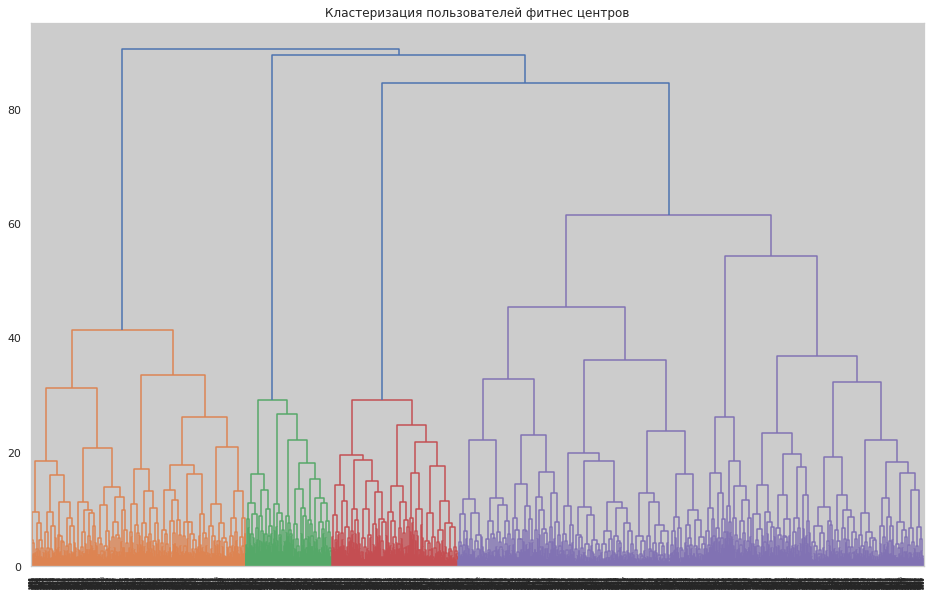

In [ ]:
# строим дендрограмму

plt.figure(figsize=(16, 10))
dendrogram(linked, orientation='top')
plt.title('Кластеризация пользователей фитнес центров')
plt.show()

**Вывод**

Данные целесообразно поделить на 4 кластера исходя из дендрограммы, но по условиям проекта необходимо использовать 5.

In [ ]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(df_sc)

In [ ]:
# добавляем в исходные данные кластеры

data['cluster_km'] = labels
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0,4
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0,3
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0,2
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0,0


In [ ]:
data.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.496447,0.500000,0.500940,0.534260,0.523316
near_location,0.995939,0.000000,1.000000,0.996028,0.862694
partner,0.892386,0.489247,0.217105,0.379345,0.471503
promo_friends,1.000000,0.078853,0.072368,0.009930,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,6.922843,2.994624,2.010338,6.208540,4.777202
group_visits,0.524873,0.232975,0.277256,0.538232,0.427461
age,29.606091,28.679211,27.583647,30.699106,29.297927
avg_additional_charges_total,153.424651,137.125763,119.339956,176.259567,144.208179
month_to_end_contract,6.332995,2.818996,1.941729,5.650447,4.466321


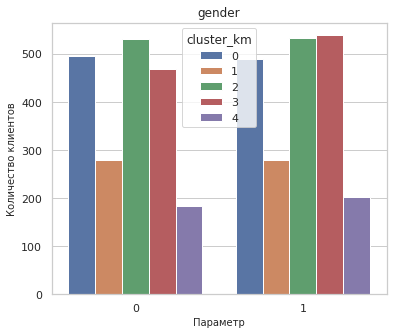

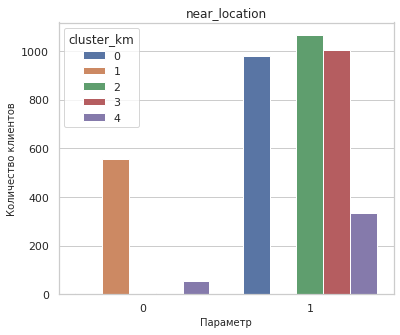

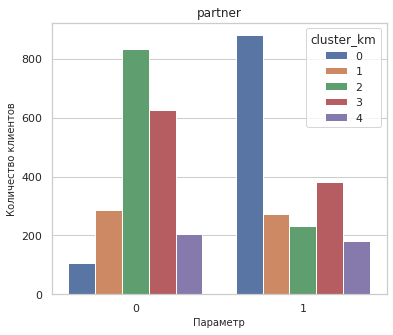

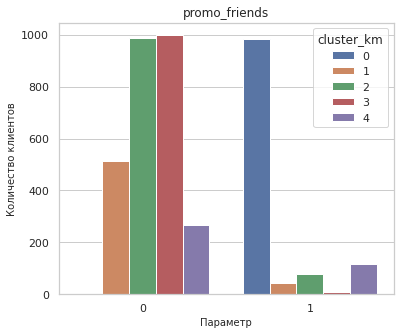

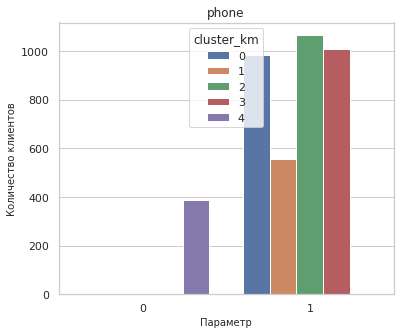

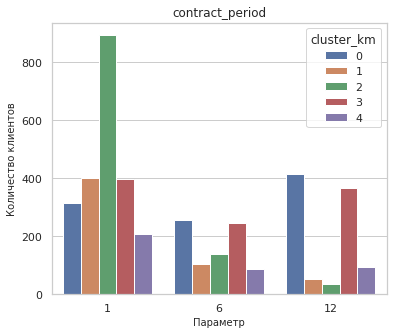

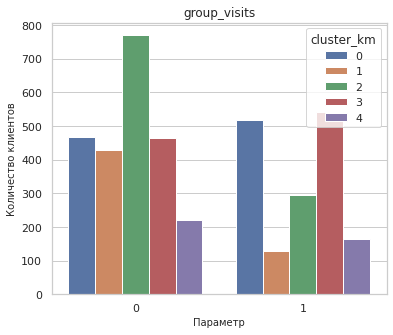

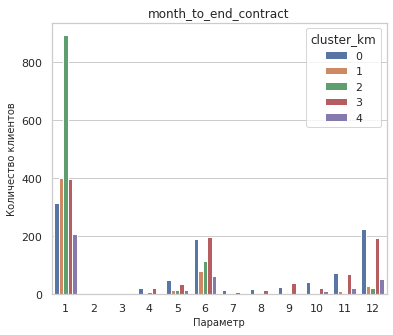

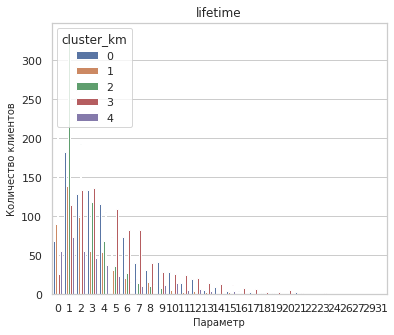

In [ ]:
data_col = data.drop(['age',
                     'avg_additional_charges_total',
                     'avg_class_frequency_total',
                     'avg_class_frequency_current_month',
                     'churn',
                     'cluster_km'], axis=1)

for col in data_col.columns:
    sns.set_style('whitegrid')
    plt.figure(figsize=(6, 5))
    sns.countplot(data=data, x=col, hue='cluster_km')
    plt.title(col, size=12)
    plt.xlabel('Параметр', size=10)
    plt.ylabel('Количество клиентов', size=10)
    plt.show()

In [ ]:
data.groupby('cluster_km')['gender'].count()

cluster_km
0     985
1     558
2    1064
3    1007
4     386
Name: gender, dtype: int64

In [ ]:
data.groupby('cluster_km')['churn'].mean()

cluster_km
0    0.119797
1    0.403226
2    0.563910
3    0.014896
4    0.266839
Name: churn, dtype: float64

**Вывод**

Среди кластеров наибольшая доля оттока у 2, меньше всего уходят клиенты, относящиеся к 3 кластеру.

**Вывод**

**`0 кластер`**

- Живут рядом с залом
- Почти 90% являются сотрудниками компаний партнёров
- Все были приглашены друзьями в рамках акции "приведи друга"
- Больше половины заключили контракт на 6 и 12 месяцев
- Посещают групповые занятия примерно половина


**`1 кластер`**

- Живут не в районе спортзала
- Половина являются сотрудниками компаний партнёров
- Основная часть пришла не по приглашению друзей
- Более половины приобрели билет только на 1 месяц
- В основном не посещают групповые занятия


**`2 кластер`**

- Живут рядом с залом
- Преобладающее количество не являются сотрудниками компаний партнёров
- Почти все пришли 1-ый раз в зал не по приглашению друзей
- Около 90% купили абонемент только на месяц
- Примерно 20% посещают групповые занятия


**`3 кластер`**

- Живут рядом с залом
- Примерно 1/3 сотрудники партнёров
- Практически 100% не были приглашены друзьями
- Покупают абонемент в основном на 1 и 12 месяцев, чуть меньше на 6
- 60% посещают групповые занятия


**`4 кластер`**

- Основная часть живёт рядом с залом
- Половина из всех - сотрудники партнёров
- 1/3 были приведены друзьями
- Около половины покупают абонемент на 1 месяц, примерно по 25% распределены на 6 и 12 месяцев
- Посещают групповые занятия почти столько же, сколько клиентов не ходят на них


**`Различия кластеров`**

- Количество клиентов по кластерам различается, больше всего во 2 и 3 кластерах, меньше всего в 4
- Наибольший отток происходит в 1 и 2 кластерах, наименьший в 3

# Общий вывод

Задачей проекта был анализ клиентской базы фитнес-центров, анализ оттока клиентов и выстраивание дальнейших взаимодействий.

**Этапы проекта:**

1. Изучение датафрейма

 - Выгрузка
 - Просмотр общей информации


2. Исследовательский анализ данных

 - Привели данные к правильному типу
 - Проверили распределение признаков по целевому признаку


3. Модель прогнозирования оттока клиентов

 - Логистическая регрессия
 - Случайный лес


4. Кластеризация клиентов

 - Дегдрограмма
 - KMeans

В результате анализа был сделан вывод, что лучше использовать `логистическую регрессию` для прогноза оттока клиентов.

**Рекомендации**

Самые лояльные клиенты входят в **`3 кластер`**, для них можно предлагать дополнительные бонусы/скидки на приобретение абонементов или покупку других фитнес услуг, организовывать ивенты. В отношении **`0 кластера`** можно использовать такие же рекомендации, поскольку клиенты имеют маленькое значение оттока и абонементы покупают в основном на 6 и 12 месяцев.

Наибольший отток происходит во **`2 кластере`**, клиенты которого в 90% случаев покупают абонемент на 1 месяц, для этого кластера можно снизить цену на приобретение годового абонемента или предоставить другие бонусы/подарки/скидки при покупке абонемента на год.


*Общие рекомендации*
 - Делать таргетинговую рекламу на людей, которые проживают в районе нахождения зала
 - Поддерживать клиентов из кластеров, которые приносят больше выручки
 - Предлагать спецпредложения и скидки для новых клиентов, чтобы увеличить удержание
 - Увеличить количество компаний-партнёров, потому что сотрудники оттуда меньше подвержены оттоку
 - Включить в годовой абонемент дополнительные преимущества для клиента, чтобы увеличилось количество клиентов с таким абонементом